In [11]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc
warnings.filterwarnings('ignore')

dataset = pd.read_csv("diabetes.csv", delimiter=",")
data = dataset.values

In [9]:
# 폰트 설정

font_path = '../datasets/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
rc("axes", unicode_minus=False)

In [12]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. EDA (탐색적 자료 분석)

<독립변수>
- Pregnancies : 임신 횟수
- Glucose : 포도당 부하 검사 수치
- BloodPressure : 혈압
- SkinThickness : 삼두근 피하지방
- Insulin : 혈청 인슐린
- BMI : 체질량
- DiabetesPedigreeFunction : 당뇨 내력 가중치
- Age : 나이
  
  
<종속변수>
- Outcome : 당뇨병 여부

## (1) 결측, 중복, 자료형 확인

In [32]:
dataset.info() 
# 결측 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
dataset.duplicated().sum()
# 중복 없음

0

In [38]:
dataset.describe()
# zero value 존재

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
# zero value 를 NaN으로 처리
dataset_copy = dataset.copy(deep = True)
dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Nan Count
print(dataset_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### 결측값 대치

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

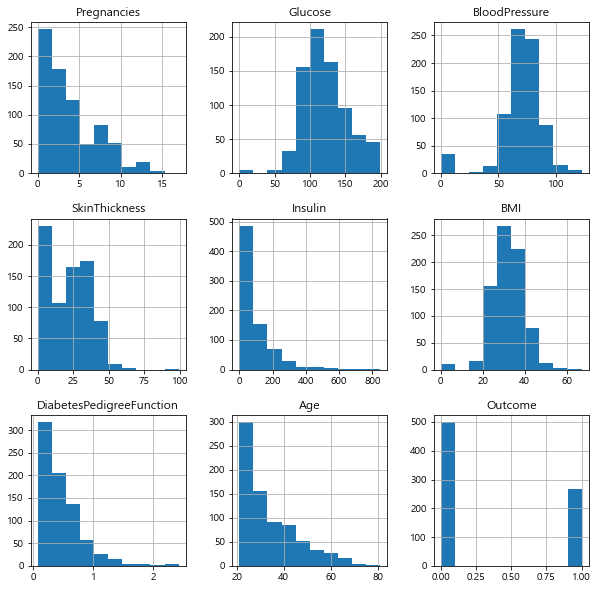

In [60]:
# 독립변수의 분포를 확인하여 결측값 처리 방식 결정

# for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']: 
#     sns.distplot(dataset.loc[dataset[col].notnull(), col])
#     plt.title(col)
#     plt.show()

dataset.hist(figsize =(10,10))

In [51]:
dataset_copy['Glucose'].fillna(dataset_copy['Glucose'].mean(), inplace = True) # 평균
dataset_copy['BloodPressure'].fillna(dataset_copy['BloodPressure'].mean(), inplace = True) # 평균

dataset_copy['SkinThickness'].fillna(dataset_copy['SkinThickness'].median(), inplace = True) # 중간값
dataset_copy['Insulin'].fillna(dataset_copy['Insulin'].median(), inplace = True) # 중간값
dataset_copy['BMI'].fillna(dataset_copy['BMI'].median(), inplace = True) # 중간값

In [54]:
# 결측값 처리 후 

dataset_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

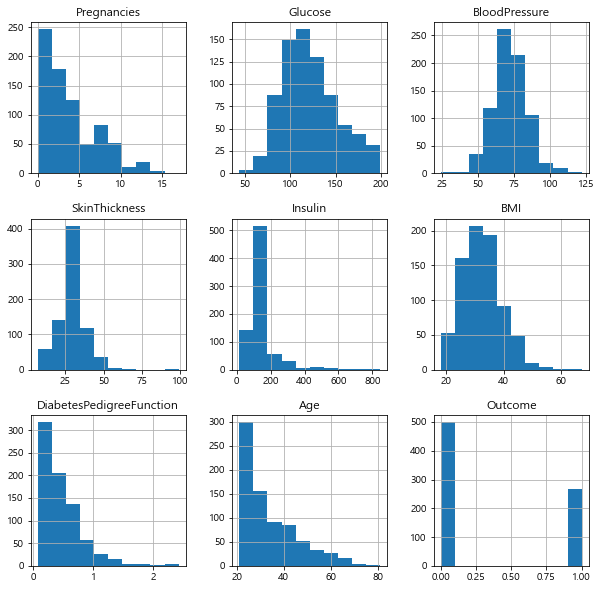

In [59]:
dataset_copy.hist(figsize =(10,10))

## (2) 종속변수 분포

<AxesSubplot:>

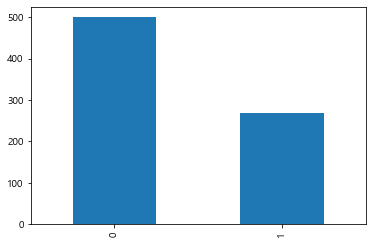

In [62]:
dataset_copy['Outcome'].value_counts().plot(kind='bar')

In [64]:
dataset_copy['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## (3) 독립변수 간 상관관계

### 히트맵
- 0.7 이상이면 유의미한 상관관계 존재

<AxesSubplot:title={'center':'변수 간 상관관계'}>

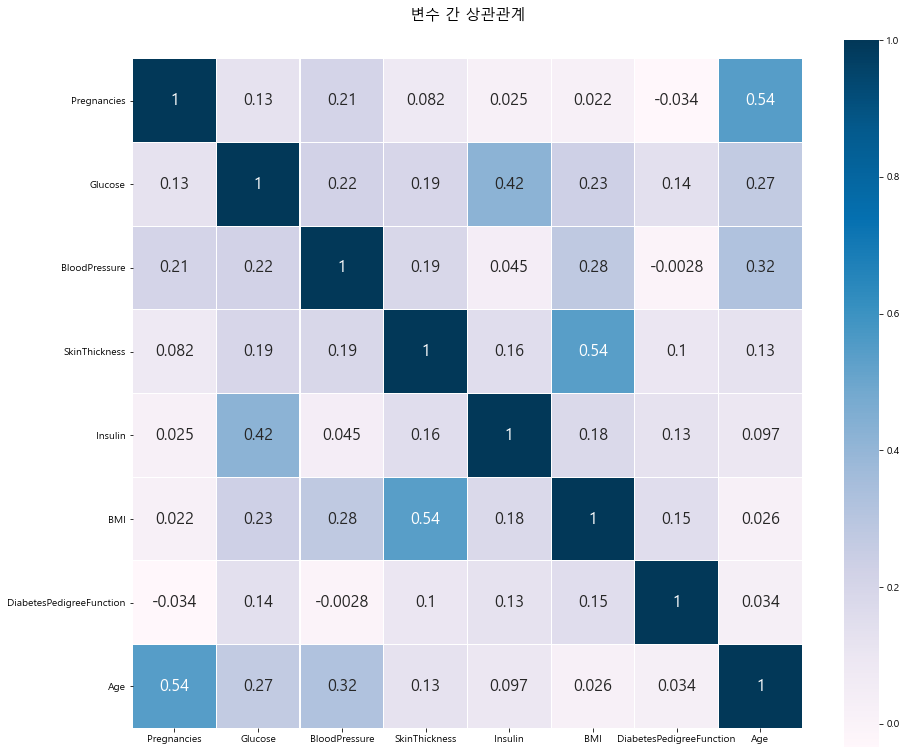

In [56]:
heatmap_data = dataset_copy[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
colormap = plt.cm.PuBu
plt.figure(figsize=(15, 13))
plt.title("변수 간 상관관계", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

### VIF(분산팽창요인)
- 10 이상이면 다중공선성 존재

In [57]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = 'Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age'
y, X = dmatrices('Outcome ~'+features, data=dataset_copy, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif.round(1)
# intercept는 기본적으로 들어감

,VIF Factor,features
0,53.3,Intercept
1,1.4,Pregnancies
2,1.4,Glucose
3,1.2,BloodPressure
4,1.5,SkinThickness
5,1.2,Insulin
6,1.6,BMI
7,1.0,DiabetesPedigreeFunction
8,1.6,Age


# 2. 스케일링 및 데이터 셋팅
- 정규화

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(dataset_copy.drop(["Outcome"], axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = dataset_copy.Outcome

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

# 3. KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,51):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [91]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [92]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.97402597402598 % and k = [18, 22, 23, 24, 26, 27, 28]


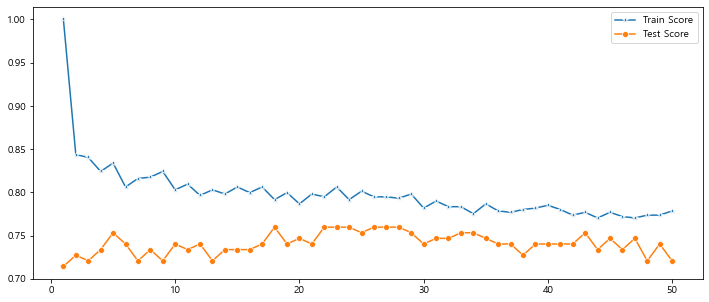

In [93]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,51),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,51),test_scores,marker='o',label='Test Score')

In [94]:
knn = KNeighborsClassifier(18)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7597402597402597

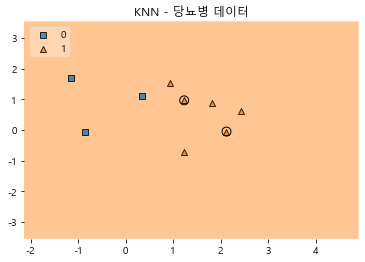

In [81]:
from mlxtend.plotting import plot_decision_regions

value = 20000
width = 20000
plot_decision_regions(X.values, y.values, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=X_test.values)


plt.title('KNN - 당뇨병 데이터')
plt.show()

# 4. 성능 평가

## 정확도

In [82]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,83,17,100
1,21,33,54
All,104,50,154


Text(0.5, 16.0, 'Predicted label')

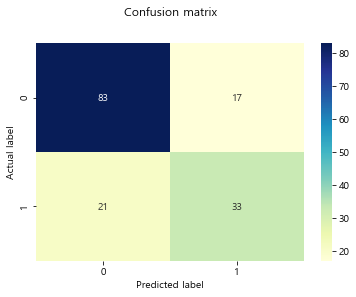

In [83]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



## ROC 커브
- 커브의 밑면적 즉 AUC의 넓이가 넓을 수록 그 모델의 성능이 좋다는 것.

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

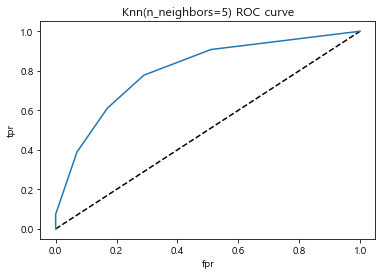

In [86]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [88]:
roc_auc_score(y_test,y_pred_proba)

0.8022222222222222

# 5. 최적화

In [89]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
